In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [4]:
#read data
path="/lustre/ytzheng/"

Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_cold2.6_fxdlhf'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100*.nc',
                      combine = 'by_coords',decode_cf = False)

In [5]:
nt = f['time'].size
t_hours = np.arange(nt)
z = f['z']/1000.

myfontsize = 12

In [64]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'neither',
         yrange = [0., 2.], xrange = [0., 65.], 
          cbar = False, xlabel = False, ylabel = False, out = False):

    norm = cm.colors.BoundaryNorm(mylevels,256)
    oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels,
                          extend = extend, norm = norm)
    
    ax.set_ylim(yrange)
    ax.set_xlim(xrange)
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

In [59]:
def pltpfl(fig, ax, x, x1, y, ind,
          xlable = '', ylable = '',
          xlim = [0, 1], ylim = [0., 1.7]):
    
    for i in ind:
        a = ax.plot(x[i], y, label = str(i) + ' h')
        ax.plot(x1[i], y, color = a[0].get_color(), linestyle = '--')

    ax.set_xlabel(xlable, fontsize=myfontsize)    
    ax.set_ylabel(ylable, fontsize=myfontsize)    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
#     ax.legend(loc="lower right", fontsize=myfontsize)

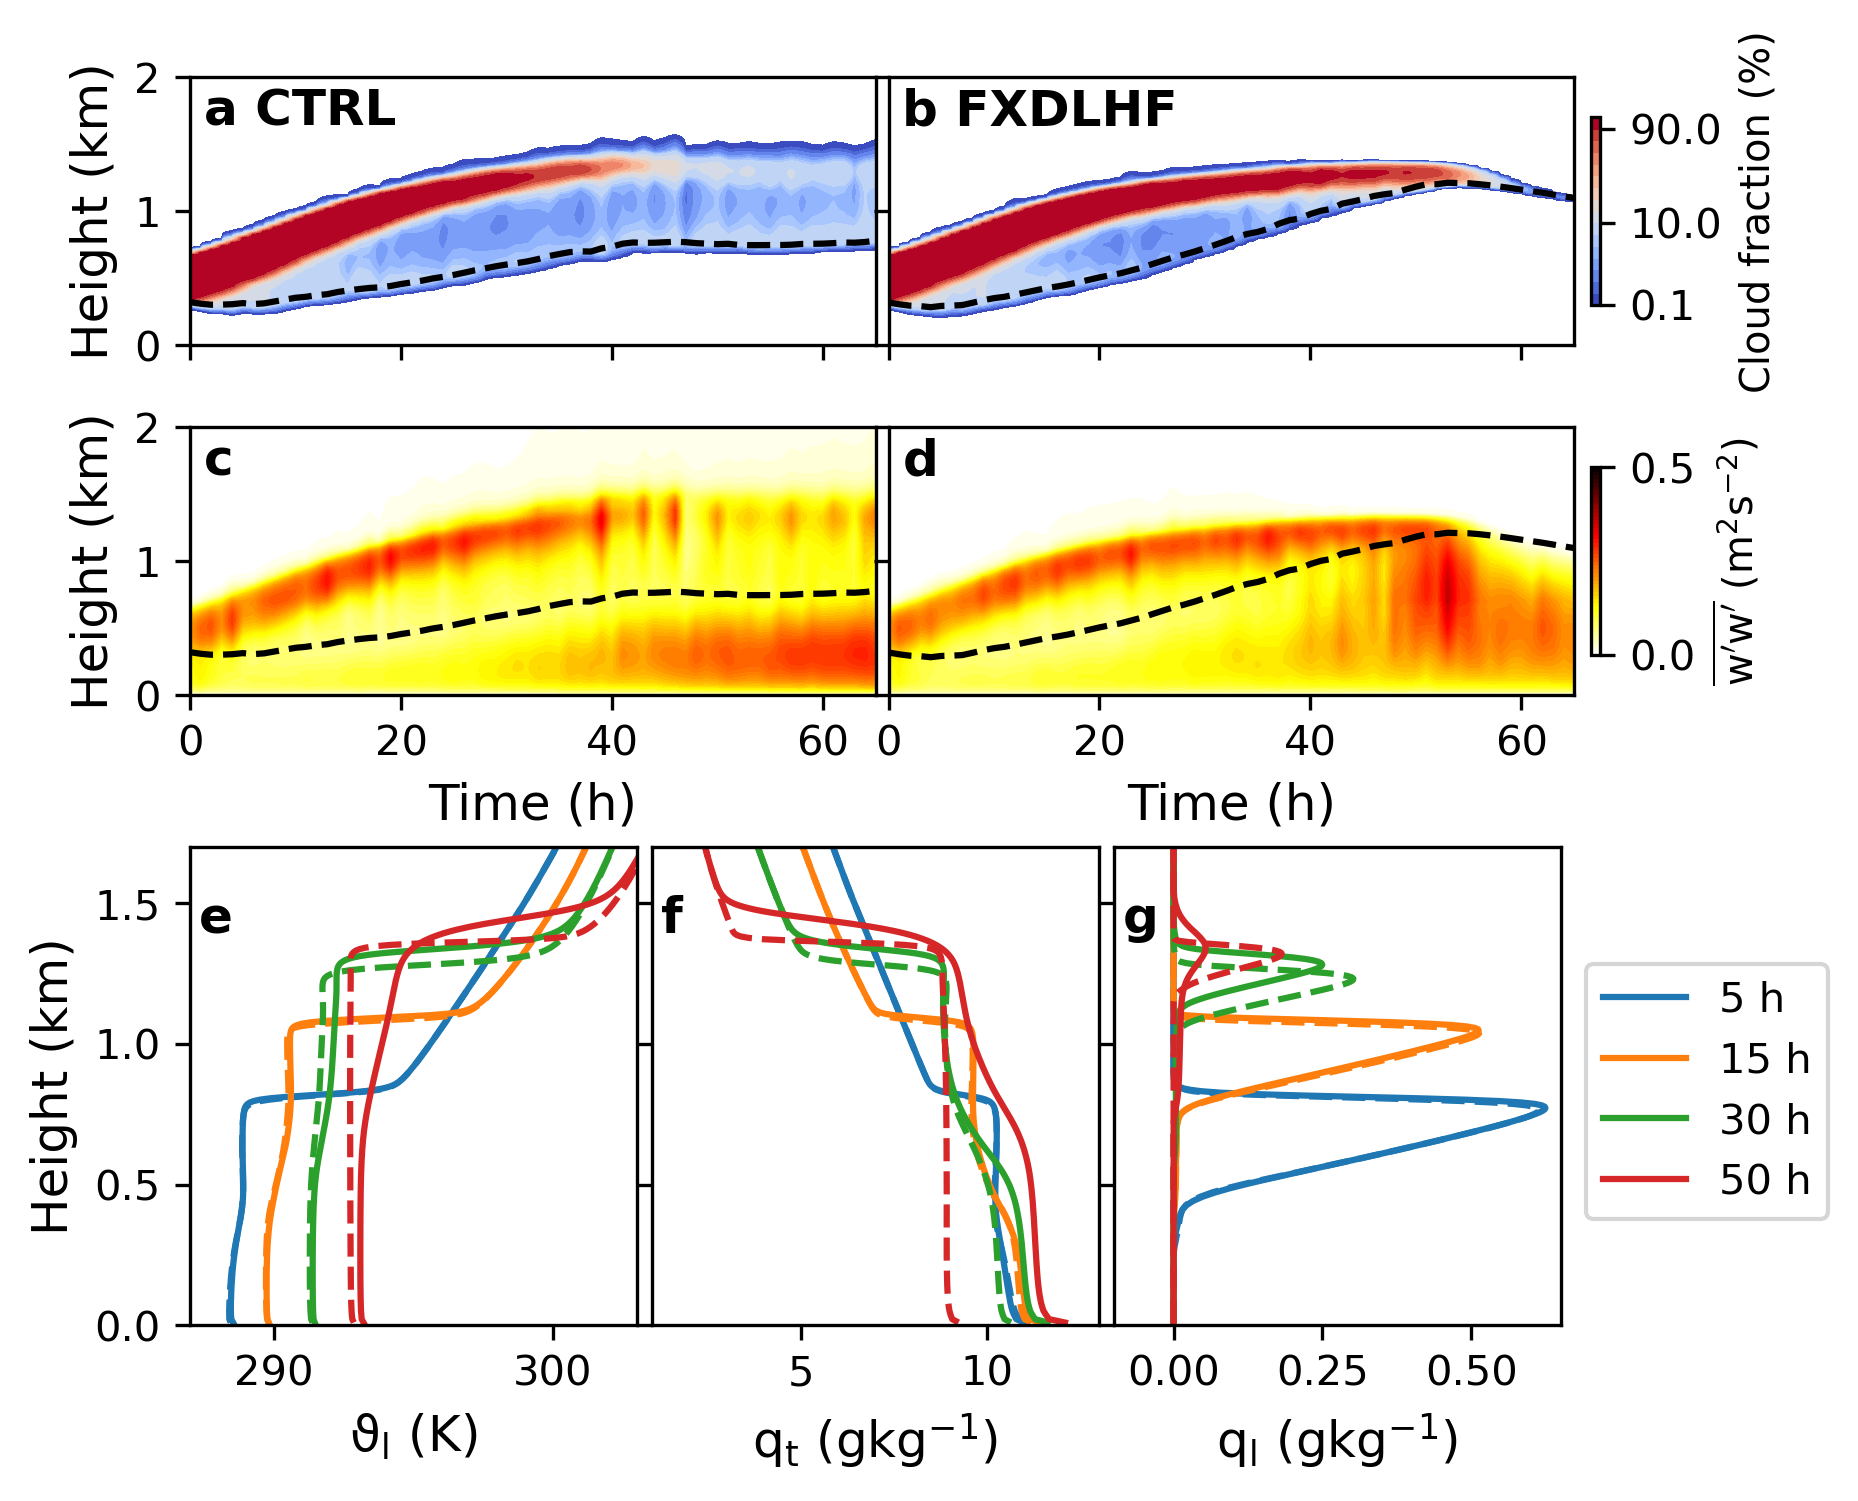

In [66]:
fig = plt.figure(figsize=(18/2.54, (14)/2.54), dpi = 300)

plt.tight_layout()

ax1 = plt.subplot2grid((18, 18), (0, 0), colspan=9, rowspan = 4)
ax2 = plt.subplot2grid((18, 18), (0, 9), colspan=9, rowspan = 4)

ax3 = plt.subplot2grid((18, 18), (5, 0), colspan=9, rowspan = 4)
ax4 = plt.subplot2grid((18, 18), (5, 9), colspan=9, rowspan = 4)

ax5 = plt.subplot2grid((18, 18), (11, 0), colspan=5, rowspan = 7)
ax6 = plt.subplot2grid((18, 18), (11, 5), colspan=5, rowspan = 7)
ax7 = plt.subplot2grid((18, 18), (11, 10), colspan=5, rowspan = 7)

#fig 1, 2
mylevels = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
oax = plt2D(fig, ax1, t_hours, z, 100.*f['CLD'].T, 'Cloud cover (%)', mycmap=cm.coolwarm, 
      mylevels=mylevels, out = True, ylabel = True)

oax = plt2D(fig, ax2, t_hours, z, 100.*f1['CLD'].T, 'Cloud cover (%)', mycmap=cm.coolwarm, 
      mylevels=mylevels, out = True)

#fig 3, 4
mylevels = np.linspace(0., 0.5, 50 + 1)
oax1 = plt2D(fig, ax3, t_hours, z, f['W2'].T, '', mycmap=cm.hot_r, 
      mylevels=mylevels, out = True, xlabel = True, ylabel = True)

oax1 = plt2D(fig, ax4, t_hours, z, f1['W2'].T, '', mycmap=cm.hot_r, 
      mylevels=mylevels, out = True, xlabel = True)

ax1.plot(t_hours, f['lcl_out'], color = 'black', linestyle = '--')
ax2.plot(t_hours, f1['lcl_out'], color = 'black', linestyle = '--')
ax3.plot(t_hours, f['lcl_out'], color = 'black', linestyle = '--')
ax4.plot(t_hours, f1['lcl_out'], color = 'black', linestyle = '--')

#fig 5,6,7
ind = [5, 15, 30, 50]

pltpfl(fig, ax5, f["THETAL"], f1["THETAL"], z, ind,
          xlable = r"$\mathrm{\vartheta_l \ (K)}$", ylable = 'Height (km)', 
          xlim = [287., 303], ylim = [0., 1.7])

pltpfl(fig, ax6, f["QT"], f1["QT"], z, ind,
          xlable = r"$\mathrm{q_t \ (gkg^{-1})}$", 
          xlim = [1., 13], ylim = [0., 1.7])

pltpfl(fig, ax7, f["QC"], f1["QC"], z, ind,
          xlable = r"$\mathrm{q_l \ (gkg^{-1})}$", 
          xlim = [-0.1, 0.65], ylim = [0., 1.7])

plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=1)

#plot colorbar
cbar = fig.colorbar(oax, ax = [ax1, ax2], orientation='vertical', 
                    shrink=0.7, pad = 0.01,ticks = [0.1, 10, 90])
cbar.set_label('Cloud fraction (%)', fontsize=0.8*myfontsize)

cbar = fig.colorbar(oax1, ax = [ax3, ax4], orientation='vertical', 
                    shrink=0.7, pad = 0.01,ticks = [0., 0.5])
cbar.set_label(r"$\mathrm{\overline{w^{\prime}w^{\prime}} \ (m^2s^{-2})}$",
               fontsize=0.8*myfontsize)

#make things more beautiful
ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])

ax2.axes.yaxis.set_ticklabels([])
ax4.axes.yaxis.set_ticklabels([])
ax6.axes.yaxis.set_ticklabels([])
ax7.axes.yaxis.set_ticklabels([])

#
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
for i, label in enumerate(('a CTRL', 'b FXDLHF','c', 'd', 'e','f','g')):
    axs[i].text(0.02, 0.82, label, transform=axs[i].transAxes,
                fontsize=myfontsize, fontweight='bold')
    
fig.savefig('Fig2_height_time_ctrl_fxdlhf.png', dpi=fig.dpi, bbox_inches='tight')